#01) **Installing and Implementing snscrape twitter hashtag scraper** 

In [1]:
# installing snscrape 
!pip install -q snscrape

In [2]:
# import all neccessities 

import snscrape
import snscrape.modules.twitter as sntwitter
import pandas as pd

**Data scraping with snscrape tool**

In [3]:
tweets_list1 = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterHashtagScraper('#JusticeForAlbert').get_items()):
    if i >0:
      tweets_list1.append([tweet.date, tweet.id, tweet.content,tweet.username,tweet.url])
    
# Creating a dataframe from the tweets list above
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text','User', 'url'])

Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=%23%23JusticeForAlbert&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaEgL7xwMvI6ygWlICz2fjjwrYpEnEVoM55FYCJehgHREVGQVVMVDUBFSwVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ConnectionError(ProtocolError('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))), retrying


In [4]:
# Viewing scraped data
tweets_df1

,Datetime,Tweet Id,Text,User,url
0,2022-01-10 14:27:14+00:00,1480546780903260166,#JUSTICEFORALBERT https://t.co/8ftrHfnhJ0,hifmradio,https://twitter.com/hifmradio/status/148054678...
1,2022-01-07 11:00:16+00:00,1479407534654042114,Rest In Peace Tomtom💔🙏🤲\nForever remain in our...,loveghana213,https://twitter.com/loveghana213/status/147940...
2,2021-12-27 09:44:33+00:00,1475402209768714240,Let’s wake up! #JusticeForAlbert https://t.co...,GhanaSocialU,https://twitter.com/GhanaSocialU/status/147540...
3,2021-12-24 09:45:41+00:00,1474315330956804100,@AfrifaEmmaline So how far with the case? #jus...,Nbayeboah,https://twitter.com/Nbayeboah/status/147431533...
4,2021-12-23 22:50:48+00:00,1474150524203249670,💔❤️. Justice #JusticeForAlbert https://t.co/P...,qweenmonty,https://twitter.com/qweenmonty/status/14741505...
...,...,...,...,...,...
2232,2014-06-05 22:30:47+00:00,474679753665167360,@chlosiv #justiceforalbert,_JoeRobertson,https://twitter.com/_JoeRobertson/status/47467...
2233,2013-09-26 03:12:29+00:00,383066518549823489,This is late but #justiceforalbert @ohhitsalbert,swaveyb,https://twitter.com/swaveyb/status/38306651854...
2234,2013-07-17 08:28:12+00:00,357416433870848000,#JusticeForAlbert,UppingDowners,https://twitter.com/UppingDowners/status/35741...
2235,2013-06-04 02:50:17+00:00,341748713498243072,r.i.p. Alby. I know I haven't seen you in awhi...,replytj,https://twitter.com/replytj/status/34174871349...


In [8]:
#Saving the data scraped into a csv  file
tweets_df1.to_csv('justice_albert')

#2) 

*  Total number of tweets using the hastags
*  Timeline tweets


*   Identifying account name and account handle of the author of the first tweet
*   Identifying tweets and the account the received the highest engagement     (Retweets+Quotes)


*   Identifying the top ten accounts with the highest number of tweets
*   Developing wordcloud  and Identifying the top 10 keywords used within the    hashtag




*   Checking for the account which posted **i thought it was a joke. But it's really real**? #JusticeForAlbert
*  Social Network Analysis 





# a)

In [9]:
# Total number of tweets 
tweets_df1['Text'].size

2237

 b) **Timeline of the tweets**

# **Installing the neattext module to help clean the noise in our data**

In [10]:
# this code installs the neattext module 
!pip install neattext

     |████████████████████████████████| 114 kB 26.7 MB/s 


In [11]:
# importting neattext for tweet cleansing
import neattext.functions as nt

In [13]:
# Extracting the hastags and merging to the tweets_d1 dataframe
tweets_df1['hastags'] = tweets_df1['Text'].apply(nt.extract_hashtags)


#**Text Cleaning using neattext module**



  **Noise Removal from tweets**

*   Removal of all hashtags in the raw text
*   Removal of all userhandels 

*   Removal of all unwanted spaces 
*   Removal  of all unwanted urls in the text

*   Removal of Punctuations
*   Removal of all emojis 

*   Removal of numbers numbers and special characters 

















In [14]:
# Text Cleaning 
# Removing all hashtags from the tweet
tweets_df1['clean_tweet'] = tweets_df1['Text']. apply(nt.remove_hashtags)

# removing all userhandles 
tweets_df1['clean_tweet'] = tweets_df1['clean_tweet']. apply(nt.remove_userhandles)

# removing all multiple spaces 
tweets_df1['clean_tweet'] = tweets_df1['clean_tweet']. apply(nt.remove_multiple_spaces)

# removing urls
tweets_df1['clean_tweet'] = tweets_df1['clean_tweet']. apply(nt.remove_urls)

#removing puctuations
tweets_df1['clean_tweet'] = tweets_df1['clean_tweet']. apply(nt.remove_puncts)

#removing emojis
tweets_df1['clean_tweet'] = tweets_df1['clean_tweet']. apply(nt.remove_emojis)

# removing numbers
tweets_df1['clean_tweet'] = tweets_df1['clean_tweet']. apply(nt.remove_numbers)

# removing other special characters 
tweets_df1['clean_tweet'] = tweets_df1['clean_tweet']. apply(nt.remove_special_characters)

In [15]:
# Viewing the first cleaned text data 
tweets_df1.head(5)

,Datetime,Tweet Id,Text,User,url,hastags,clean_tweet
0,2022-01-10 14:27:14+00:00,1480546780903260166,#JUSTICEFORALBERT https://t.co/8ftrHfnhJ0,hifmradio,https://twitter.com/hifmradio/status/148054678...,[#JUSTICEFORALBERT],
1,2022-01-07 11:00:16+00:00,1479407534654042114,Rest In Peace Tomtom💔🙏🤲\nForever remain in our...,loveghana213,https://twitter.com/loveghana213/status/147940...,"[#Rest, #justiceforalbert]",Rest In Peace TomtomForever remain in our hear...
2,2021-12-27 09:44:33+00:00,1475402209768714240,Let’s wake up! #JusticeForAlbert https://t.co...,GhanaSocialU,https://twitter.com/GhanaSocialU/status/147540...,[#JusticeForAlbert],Lets wake up
3,2021-12-24 09:45:41+00:00,1474315330956804100,@AfrifaEmmaline So how far with the case? #jus...,Nbayeboah,https://twitter.com/Nbayeboah/status/147431533...,[#justiceforalbert],So how far with the case
4,2021-12-23 22:50:48+00:00,1474150524203249670,💔❤️. Justice #JusticeForAlbert https://t.co/P...,qweenmonty,https://twitter.com/qweenmonty/status/14741505...,[#JusticeForAlbert],Justice


# c)

In [16]:
# filtering and sorting data by date to get the first tweet
data_first_tweet = tweets_df1.sort_values(by="Datetime",axis = 0, ascending=True)
data_first_tweet.iloc[0]

Datetime                               2013-02-25 09:31:47+00:00
Tweet Id                                      305973357805961216
Text                               @CorksRedFM #JusticeForAlbert
User                                                       K93J_
url            https://twitter.com/K93J_/status/3059733578059...
hastags                                      [#JusticeForAlbert]
clean_tweet                                                     
Name: 2236, dtype: object

# d)

# e)

In [17]:
# importing a Counter function 
from collections import Counter


# Defining a funtion to get the 10 accounts with the highest number of original tweet in the word cloud
def get_account(docx, num=10):
  word_tokens = Counter(docx)
  most_common = word_tokens.most_common(num)
  result = dict(most_common)
  return result

# getting the top ten account
get_account(tweets_df1['User'])


{'AkweiMr': 39,
 'CSexier': 51,
 'HubRevelation': 35,
 'King20215880': 104,
 'KweiMensah2': 37,
 'SothgKeys': 44,
 'TheKingIsAwake': 40,
 'YESITOLDYOU': 51,
 'skabalita23': 40,
 'yourChristfan': 52}

# f )

g) **Wordcloud**
- JusticeForAlbert 

In [18]:
# Sentence Tokenizer 
sentence_list = tweets_df1['clean_tweet'].apply(nt.remove_stopwords).tolist()

In [19]:
# importing the neccessary libraries to plot wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

In [20]:
# tokenizing text 
tokenized = [token for word in sentence_list for token in word.split()]
# Joining all the words as one document
worddocx = " ".join(tokenized)

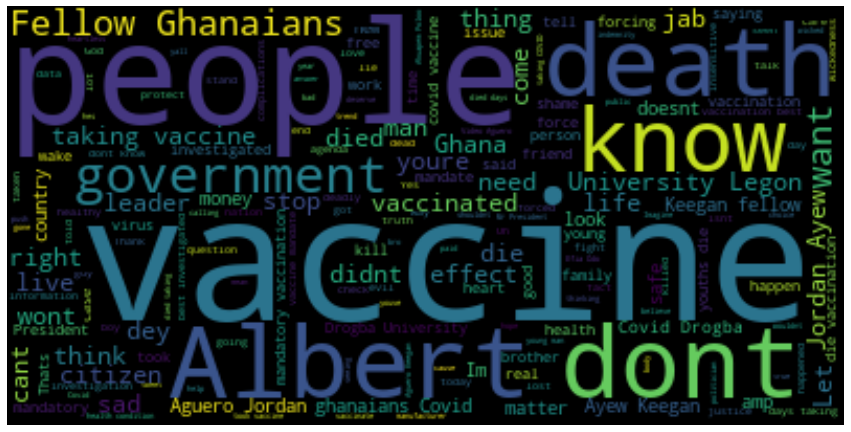

In [22]:
# defining a function to plot word cloud 
def plot_wordcloud(docx):
  plt.figure(figsize = ( 15,20))
  #
  mywordcloud = WordCloud().generate(docx)
  plt.imshow(mywordcloud, interpolation ='bilinear')
  plt.axis('off')
  plt.show()

# plotting the wordcloud 
plot_wordcloud(worddocx)

# The wordcloud plot suggests the following ;



1. It is more likely that the tweets are mainly about the covid vaccine

2. Also it can be seen that people have been taking the vaccine

3. Also there seem to be  a correlation between the word Albert and death 

4. It seem Albert has died due to the vaccine
5.  It also seem the people are protesting against the covid vaccine campaign






## **Getting the top 10 keywords used in the tweets**

In [23]:
# import a funtion to count available words
from collections import Counter

# Defining a funtion to get the 10 keywords in the word cloud
def get_tokens(docx, num=10):
  word_tokens = Counter(docx)
  most_common = word_tokens.most_common(num)
  result = dict(most_common)
  return result


#getting the key words 
get_tokens(tokenized)

{'Albert': 131,
 'Ghana': 107,
 'death': 114,
 'dont': 117,
 'know': 118,
 'people': 291,
 'taking': 125,
 'vaccination': 112,
 'vaccine': 447,
 'vaccines': 148}

# h)
 **The account that postesd that tweet is 'MustaphaAbdulSw'**

In [24]:
#Checking for the account which posted ''I thought it was a joke. But it's really real?'' #JusticeForAlbert
account = tweets_df1[tweets_df1['clean_tweet'].str.contains("I thought ...")]
# fetching details
account.iloc[5]

Datetime                               2021-12-15 12:55:50+00:00
Tweet Id                                     1471101693123252235
Text           I thought it was a joke. But it’s really real?...
User                                             MustaphaAbdulSw
url            https://twitter.com/MustaphaAbdulSw/status/147...
hastags                                      [#JusticeForAlbert]
clean_tweet         I thought it was a joke But its really real 
Name: 1761, dtype: object